## Data Wrangling:

In [1]:
#import packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import random
from scipy import stats
#import data
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv',sep =';')
assert pd.notnull(white).all().all()
assert pd.notnull(red).all().all()

In [2]:
# inspect red wine data
print('Red:')
print('Info:')
print(red.info())
print('Columns:')
print(red.columns)

print()

#inspect white wine data
print('White:')
print('Info:')
print(white.info())
print('Columns:')
print(white.columns)


Red:
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
Columns:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

White:
Info:
<class 'pandas.core.frame

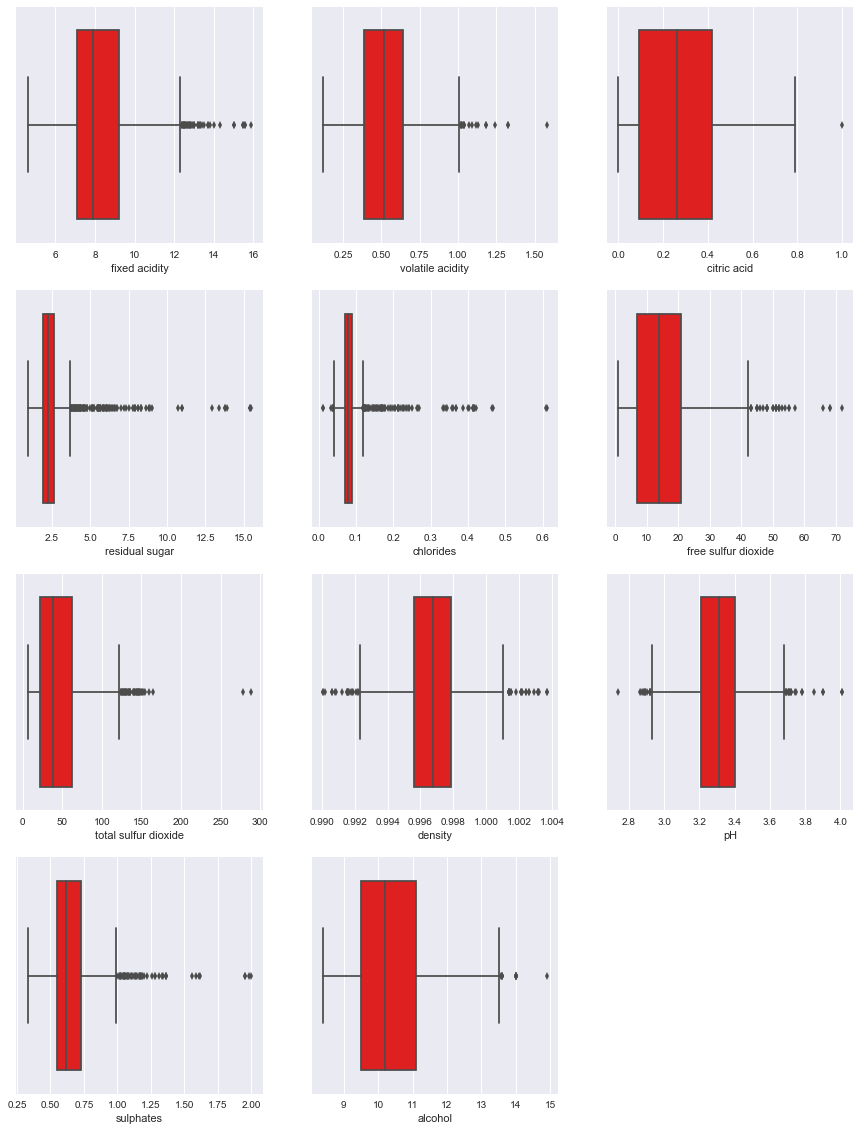

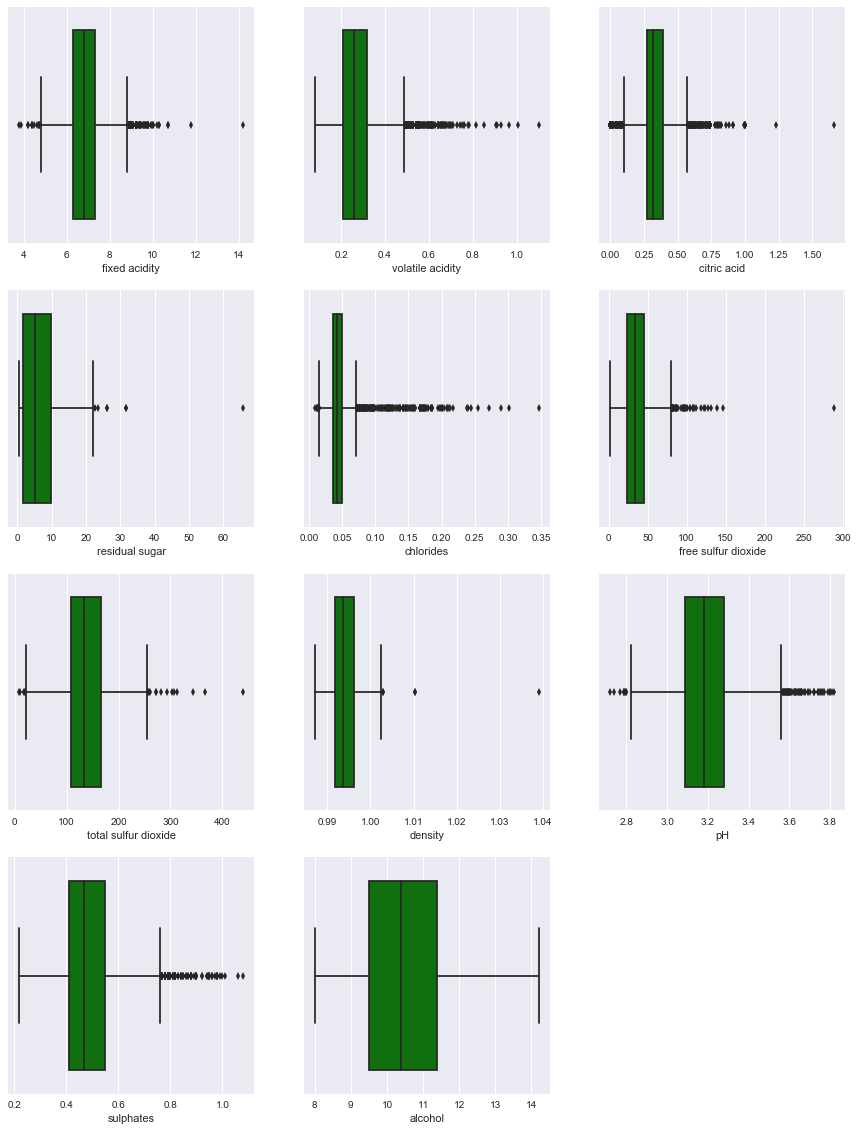

In [3]:
# check boxplots of observed physichemical variables for normality and outliers
sns.set()

#increase  figure size
mpl.rcParams['figure.figsize'] = (15,20)

#loop through red variables to check
for i, col in enumerate(red.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(red[col], color = 'red')
plt.show()
    
# loop through white variables to check
for i, col in enumerate(white.columns[:11]):
    plt.subplot(4,3,i+1)
    sns.boxplot(white[col], color = 'green')
plt.show()

In [4]:
# check quality variable spread white
white.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


In [5]:
# check quality variable spread red
red.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [6]:
# removing outliers that are more than 3 standard deviations
# loop through physiochemical variables of white to remove outliers
sum1 = 0
len1 = len(white.alcohol)
print('White outliers removed due to')
for idx in white.columns[:11]:
    length = len(white[idx])
    p975, p25 = np.percentile(white[idx], [99.85 ,0.15])
    white = white.loc[white[idx]<= (p975)]
    white = white.loc[white[idx]>=p25]
    sum1 += length - len(white[idx])
    print(idx,':', length - len(white[idx]) )
print('Total white removed:',sum1, ',   Percent Deleted:', sum1/len1 )
print()

# loop through physiochemical variables of red to remove outliers
sum1=0
len1 = len(red.alcohol)
print('Red outliers removed due to')
for idx in red.columns[:11]:
    length = len(red[idx])
    p975, p25 = np.percentile(red[idx], [99.85 ,0.15])
    red = red.loc[red[idx]<= (p975)]
    red = red.loc[red[idx]>= (p25)]
    sum1 += length - len(red[idx])
    print(idx,':', length - len(red[idx]))
print('Total red removed:',sum1 , ',   Percent Deleted:', sum1/len1 )


#create dictionary tochange quality categorical variables: 1-4 = poor , 5-7 = good, and 8-10 =excellent
dic = {1:'poor', 2:'poor', 3: 'poor', 4: 'poor', 5:'good', 6: 'good', 7: 'excellent', 8: 'excellent', 9: 'excellent', 10: 'excellent'}
#use .replace and dic on white quality
white.quality = white.quality.replace(dic)
#use .replace and dic on red quality
red.quality = red.quality.replace(dic)

White outliers removed due to
fixed acidity : 15
volatile acidity : 14
citric acid : 8
residual sugar : 10
chlorides : 15
free sulfur dioxide : 9
total sulfur dioxide : 15
density : 16
pH : 13
sulphates : 11
alcohol : 11
Total white removed: 137 ,   Percent Deleted: 0.027970600244997958

Red outliers removed due to
fixed acidity : 6
volatile acidity : 6
citric acid : 3
residual sugar : 5
chlorides : 6
free sulfur dioxide : 6
total sulfur dioxide : 6
density : 6
pH : 4
sulphates : 6
alcohol : 2
Total red removed: 56 ,   Percent Deleted: 0.035021888680425266


## Data story:
    The first item of note is that in both data sets good wines are very common but there are very for poor and excellent wines.

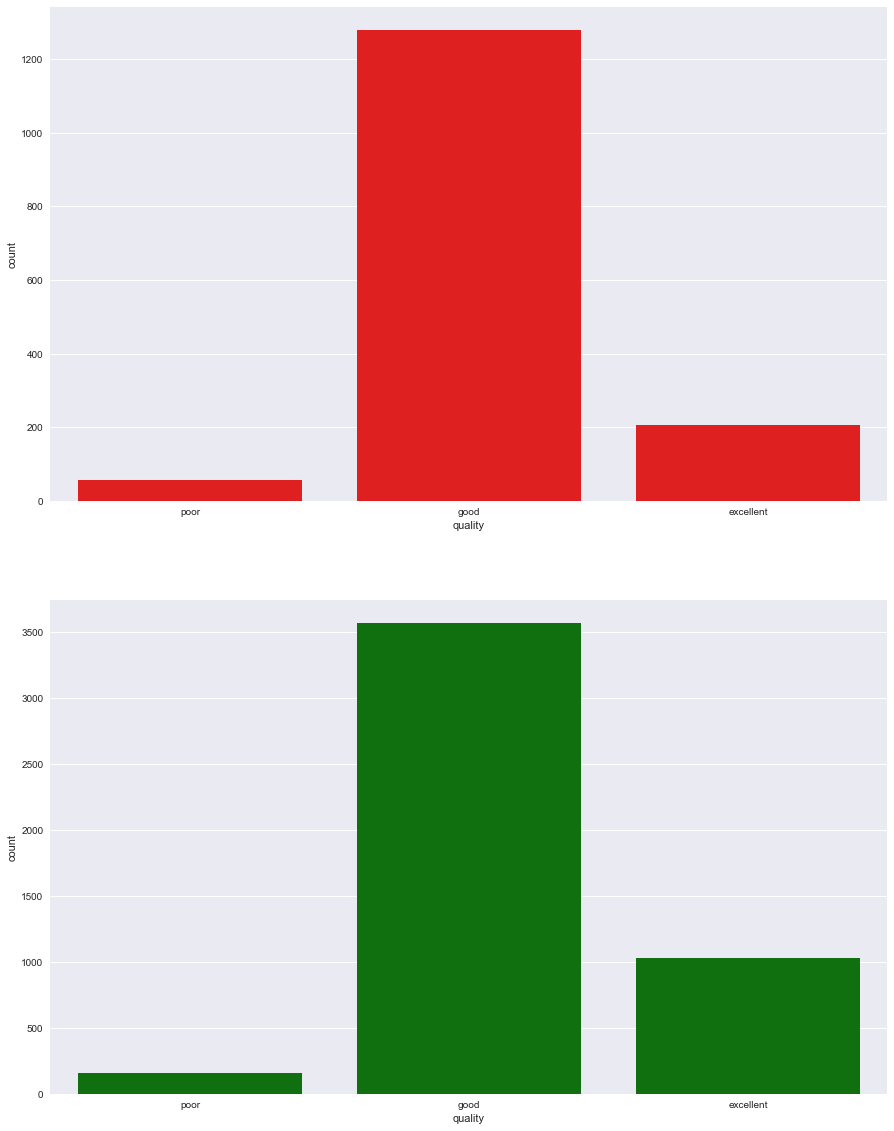

In [7]:
# show how there are a lot of good wines and very few poor or excellent
sns.set()
plt.subplot(2,1,1)
Countplot = sns.countplot(x ='quality', data = red, color ='red', order = ['poor', 'good', 'excellent'])
plt.subplot(2,1,2)
Countplot = sns.countplot(x = 'quality' ,data = white , color ='green', order = ['poor', 'good', 'excellent'])
plt.show()

Which physiochemical properties have differences in spread between poor, good, and excellent quality wines?

Red:


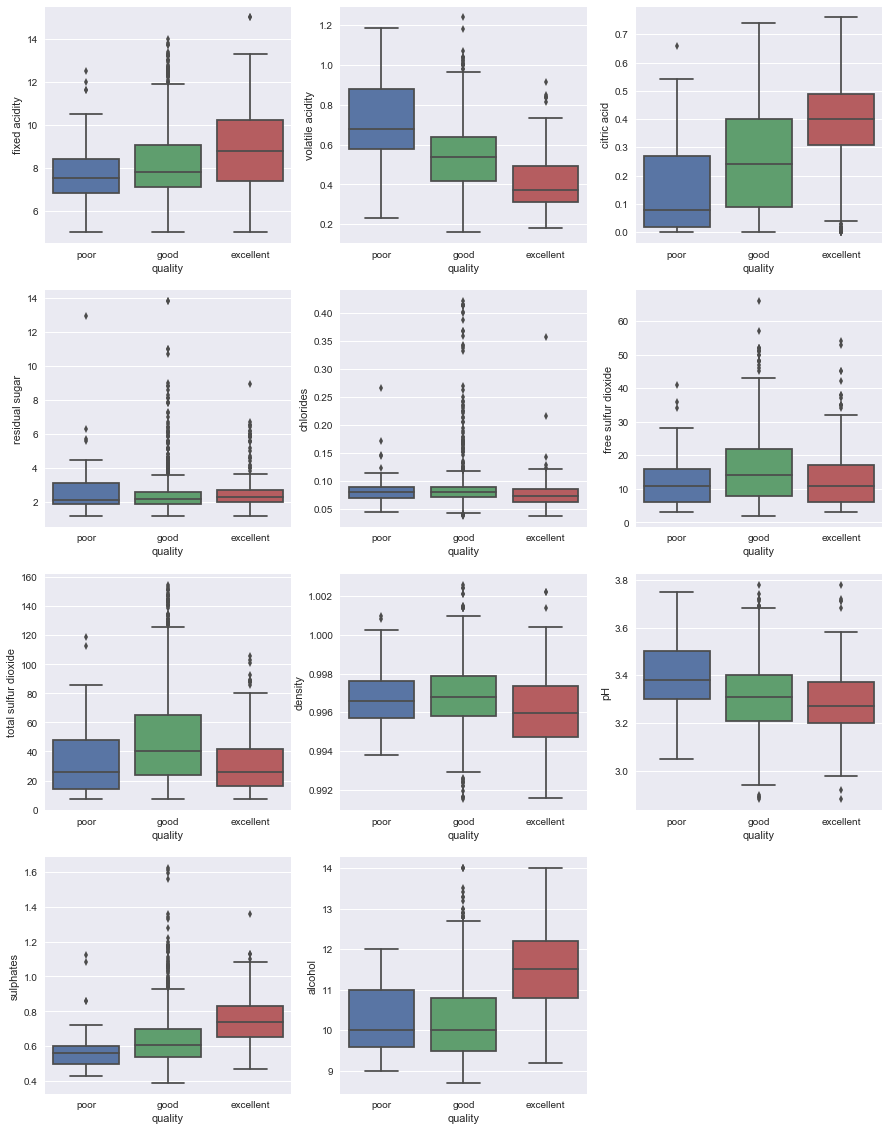

White:


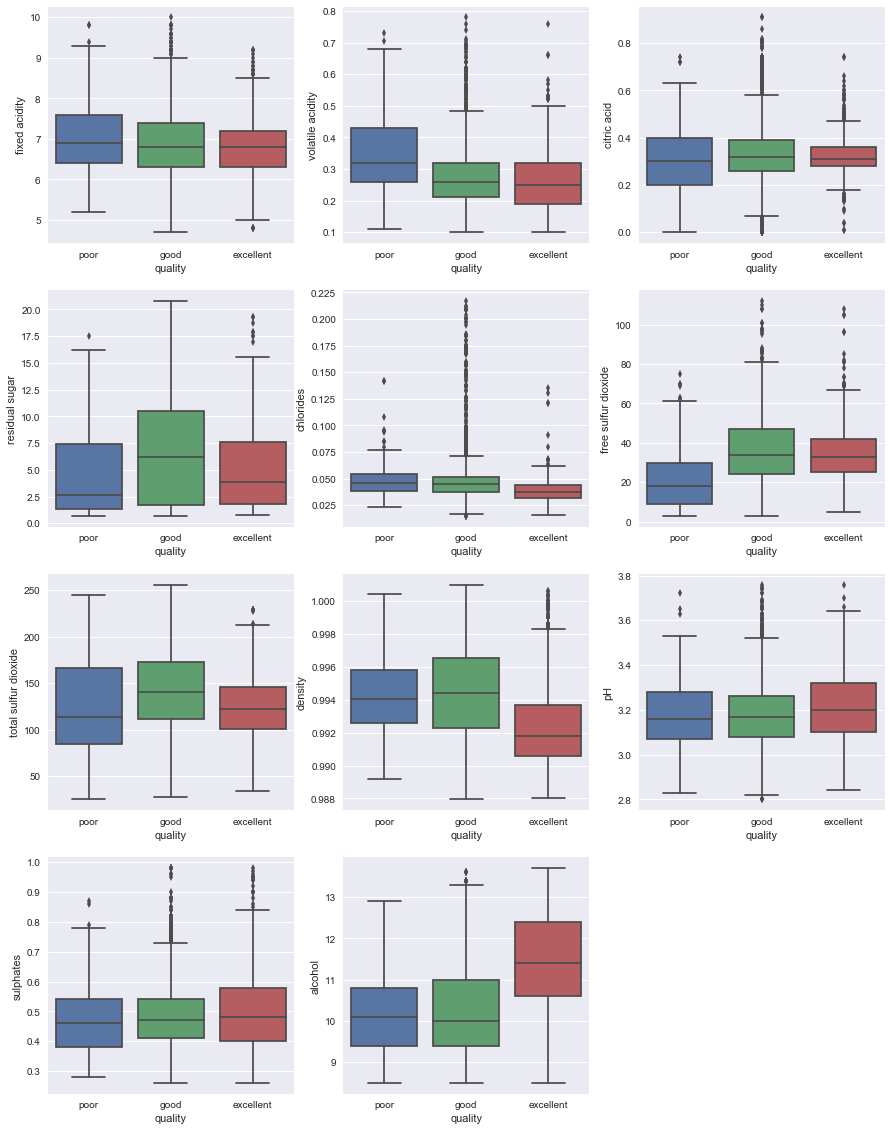

In [8]:
# check physiochemical influence on quality
sns.set()
# check red
print('Red:')
for i, col in enumerate(red.columns[:11]):
    redBoxplots = plt.subplot(4,3,i+1)
    redBoxplots = sns.boxplot(x='quality',y=col, data = red, order = ['poor', 'good', 'excellent'])
plt.show()
#check white
print('White:')
for i, col in enumerate(white.columns[:11]):
    whiteBoxplots = plt.subplot(4,3,i+1)
    whiteBoxplots = sns.boxplot(x='quality',y=col, data = white, order = ['poor', 'good', 'excellent'])
plt.show()


    The above graphs show that there are differences in spread amoung certain physicochemical properties. The question still remains if these differences are significant however. Inferential statistics will be needed to answer this question accuately.

Investigate importance of combined physiochemical properties using regression and pairplot on the normailized z scores:

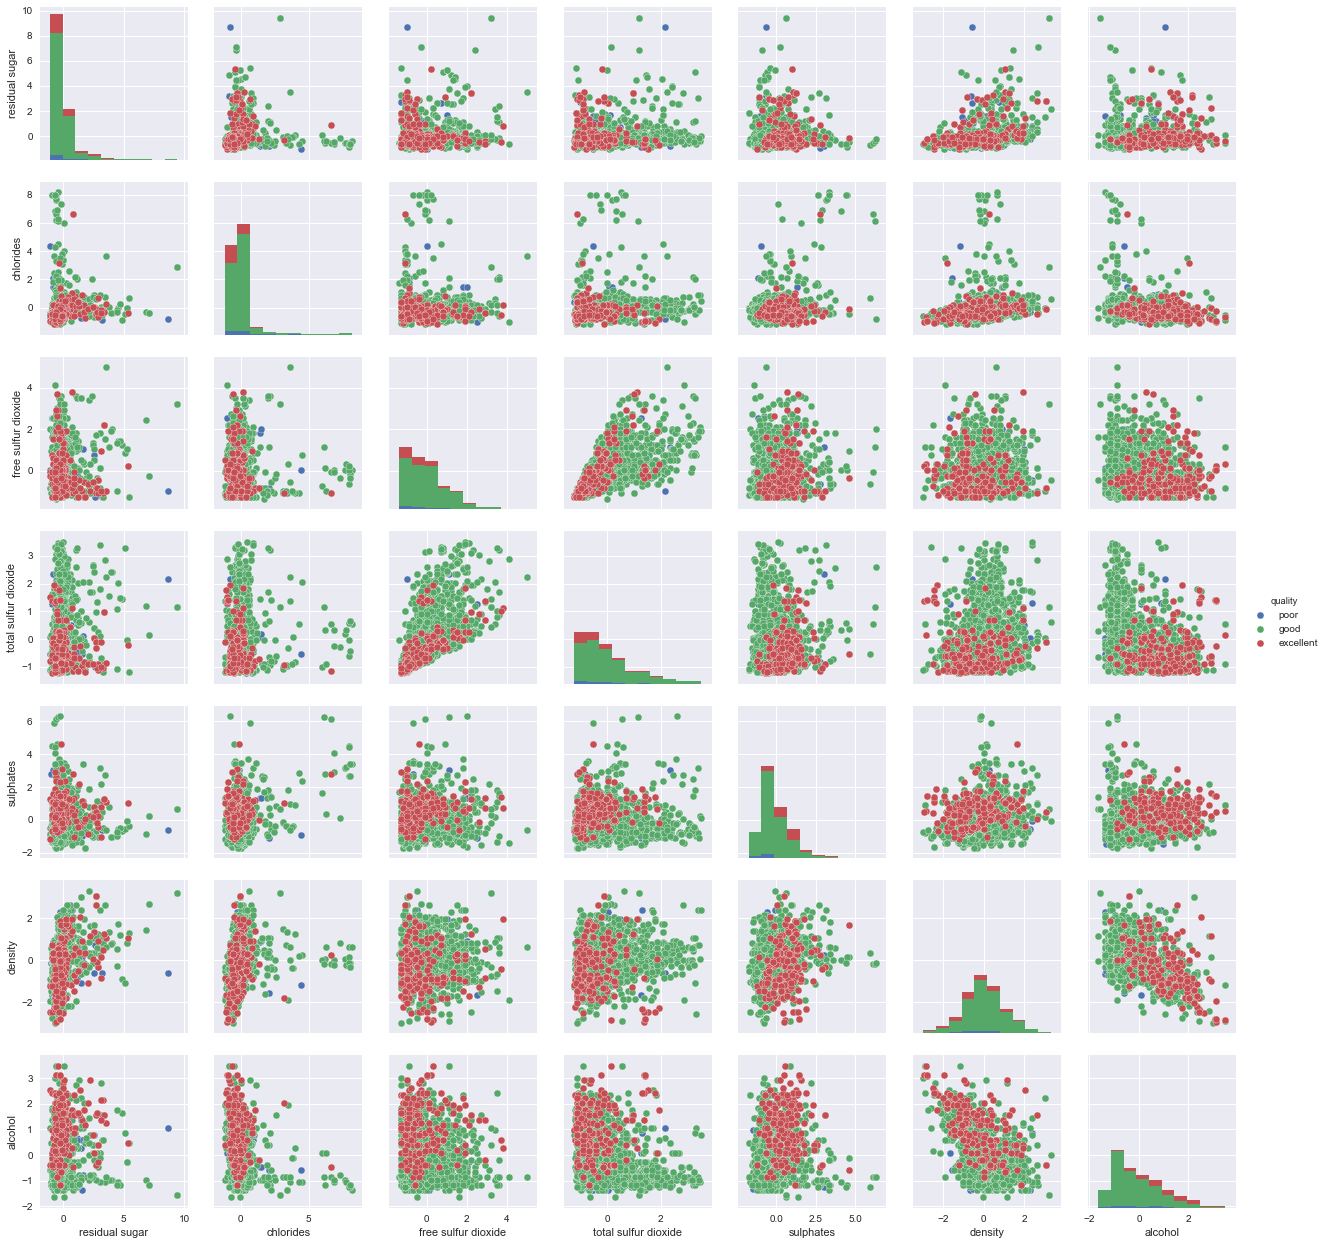

In [9]:
#create normalized data to plot
cols = list(red.columns)
cols.remove('quality')
redNorm = pd.DataFrame()
for col in cols:
    redNorm[col] = (red[col] - red[col].mean())/red[col].std(ddof=0)
redNorm['quality']  = red['quality']
sns.set()
redPairplot = sns.pairplot(redNorm, hue = 'quality', hue_order =['poor','good', 'excellent'], vars =['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates',  'density','alcohol'])
plt.show()

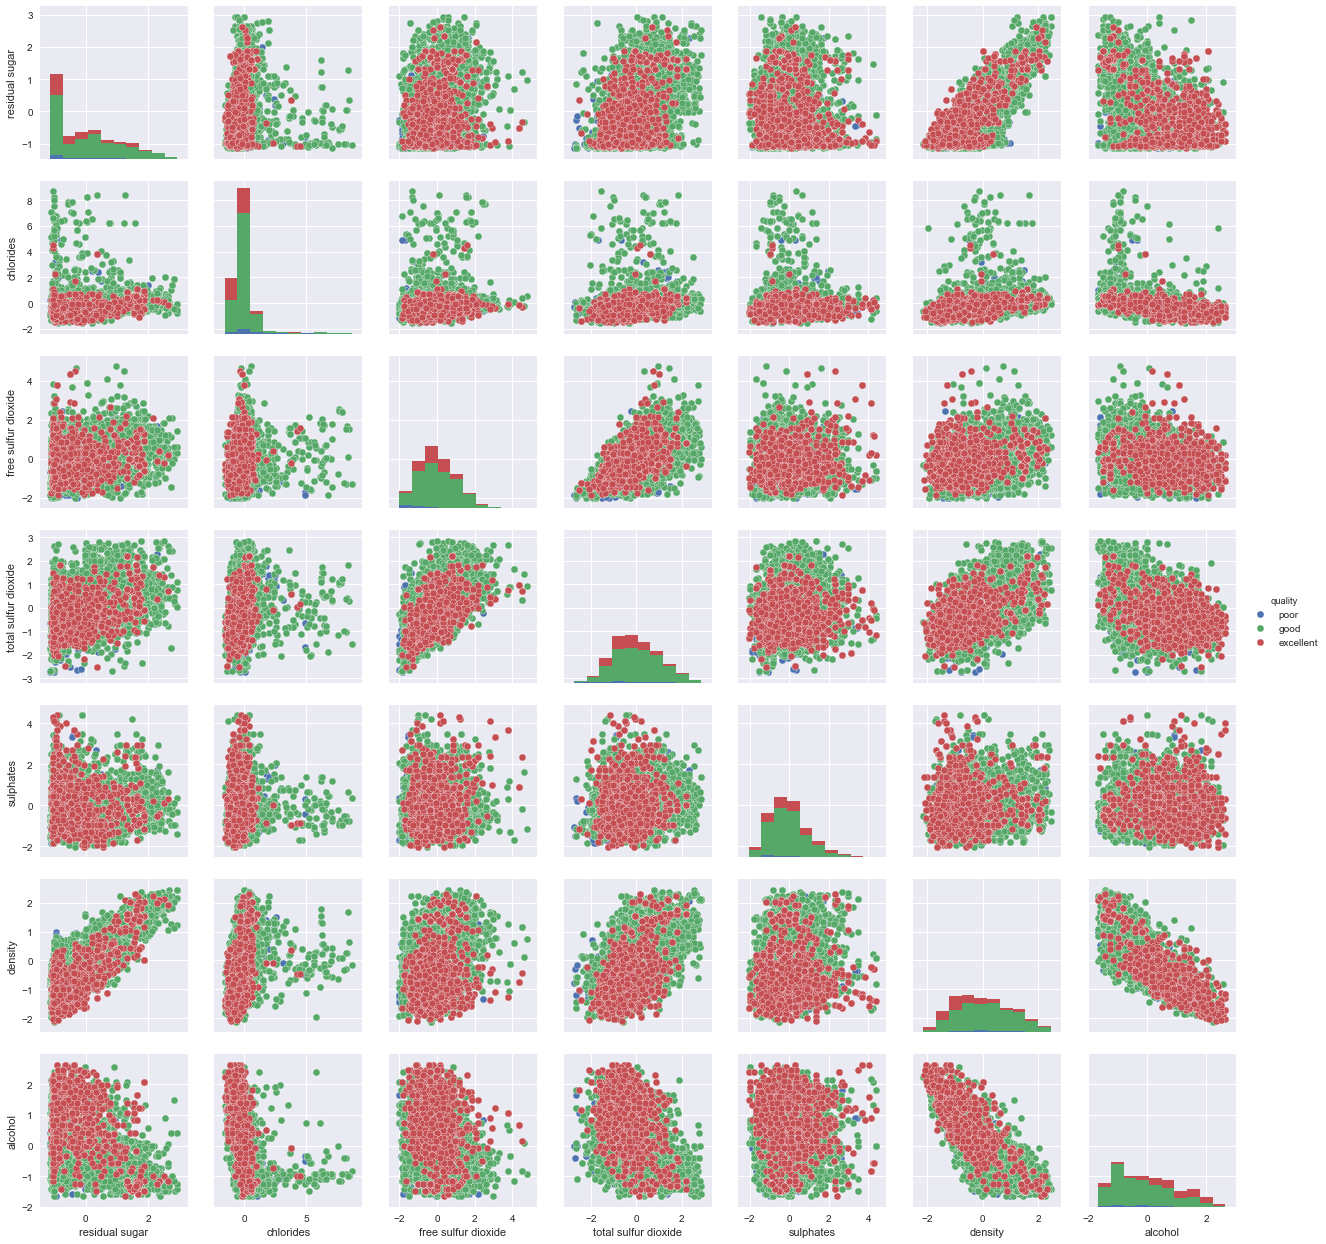

In [10]:
#create normalized data to plot
cols = list(white.columns)
cols.remove('quality')
whiteNorm = pd.DataFrame()
for col in cols:
    whiteNorm[col] = (white[col] - white[col].mean())/white[col].std(ddof=0)
whiteNorm['quality']  = white['quality']

sns.set()
whitePairplot = sns.pairplot(whiteNorm.sample(frac= 1), hue = 'quality', hue_order =['poor','good', 'excellent'], vars =['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'density','alcohol'])
plt.show()

    The above pairplots futher show the impact of certain physicochemical properties and uses color to show which quality the obeservation was. Areas with concentraded red observations show that residual sugar, chlorides, density, and alcohol may be some of the most impactful physicochemical properties. Again inferential statistics will be needed to make definitive answers regarding the influnce these factors have on the output variable quality.
    
## Inferential Statistics

In [11]:
#create white excellent and good dataframes
whiteExce = white[white.quality == 'excellent']
whiteGood = white[white.quality == 'good']


#create red excellent and good dataframes
redExce = red[red.quality == 'excellent']
redGood = red[red.quality == 'good']


In [12]:
# null hypothesis: excellent wines have the same mean as good wines
for i in whiteExce.columns[:11]:
    t, p= stats.ttest_ind(whiteExce[i],whiteGood[i],equal_var=True)
    print('White',i,'ttest p value: ',p )
    print('Reject null hypothesis :', p<0.01)

print()

for i in redExce.columns[:11]:
    t,p = stats.ttest_ind(redExce[i],redGood[i], equal_var=True)
    print('Red',i,'ttest pvalue:', p)
    print('Rejected null hypothesis:', p<0.01)



White fixed acidity ttest p value:  8.33957651616e-05
Reject null hypothesis : True
White volatile acidity ttest p value:  0.000533712588446
Reject null hypothesis : True
White citric acid ttest p value:  0.028106139516
Reject null hypothesis : False
White residual sugar ttest p value:  2.43390399189e-16
Reject null hypothesis : True
White chlorides ttest p value:  4.70596918447e-38
Reject null hypothesis : True
White free sulfur dioxide ttest p value:  0.00618038533319
Reject null hypothesis : True
White total sulfur dioxide ttest p value:  1.93334670957e-32
Reject null hypothesis : True
White density ttest p value:  1.30536793356e-85
Reject null hypothesis : True
White pH ttest p value:  1.63555213429e-09
Reject null hypothesis : True
White sulphates ttest p value:  0.00496399286354
Reject null hypothesis : True
White alcohol ttest p value:  6.1882635116e-157
Reject null hypothesis : True

Red fixed acidity ttest pvalue: 2.11467028371e-07
Rejected null hypothesis: True
Red volatile a

white rejected null hypothesis  at alpha =.01 are :
* fixed acidity, volatile acidity, residual sugar, chlorides, free sulfer dioxide, total sulfer dioxide,  density, pH, sulphates, and alcohol

red rejected null hypothesis  at alpha =.01 are :
* fixed acidity, volatile acidity, citric acid, chlorides, free sulpher dioxide, total sulpher dioxide, density, sulphates, and alcohol

shared rejected hull hypothesis between red and white wines are : 
* fixed acidity, volatile acidity, chlorides, free sulfer dioxide, total sulfer dioxide, density, sulphates, and alcohol

accepted null hypothesis white:
* citric acid

accepted null hypothesis red:
* residual sugar (just barely), ph

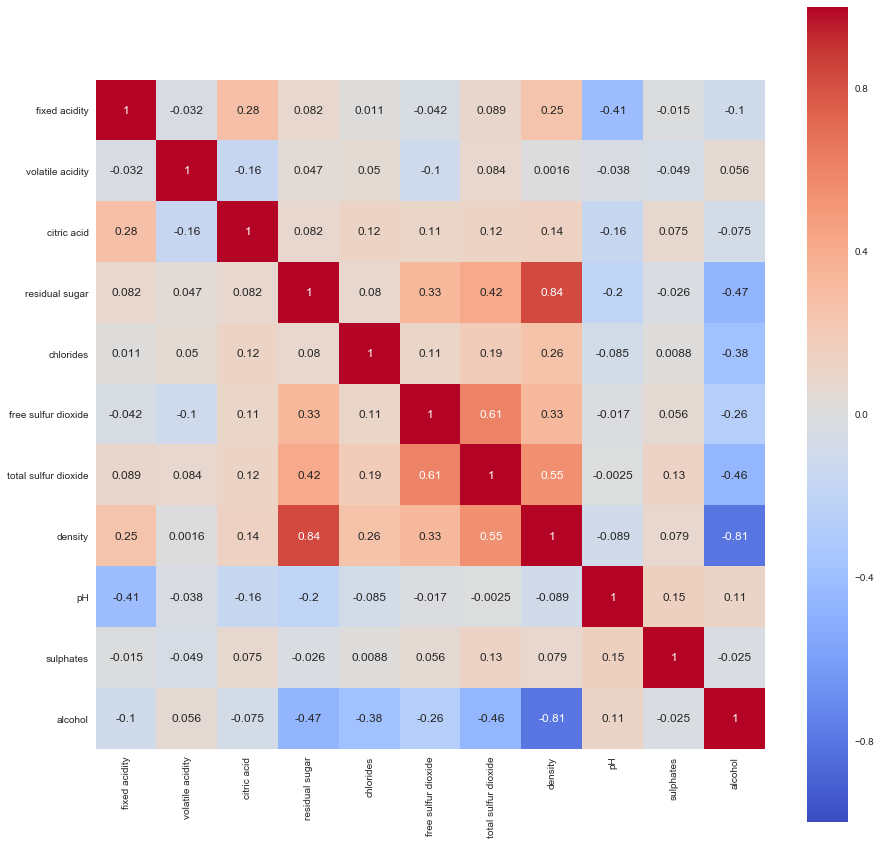

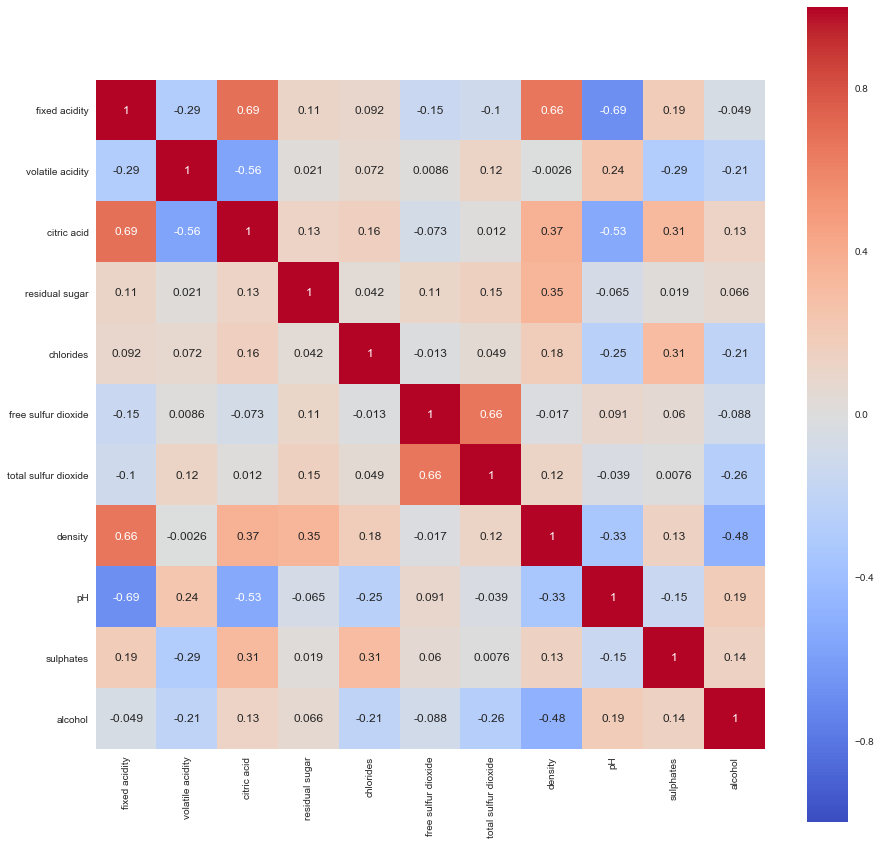

In [13]:
#change  figure size
mpl.rcParams['figure.figsize'] = (15,15)

# show correlation between properties white
whitecorrheatmap =sns.heatmap(white.drop('quality', axis = 1).corr(), annot=True, vmin =-1, cmap = 'coolwarm', square =True)
plt.show()

# show correlation between properties red
redcorrheatmap = sns.heatmap(red.drop('quality', axis = 1).corr(), annot =True, vmin=-1, cmap = 'coolwarm', square =True)
plt.show()


strong correlations with greater magnitude than .7 white:
* density-alcohol and density-residual sugar

strong correlations with greater magnitude than .7 red:
* none although ph and fixed acidity have a correlation of -.69


In [14]:
# save desired figures:

fig1 = Countplot.get_figure()
fig1.savefig("Count.png")

fig2 = redBoxplots.get_figure()
fig2.savefig("redBox.png")

fig3 = whiteBoxplots.get_figure()
fig3.savefig("whiteBox.png")

redPairplot.savefig("redPair.png")

whitePairplot.savefig("whitePair.png")

fig6 = whitecorrheatmap.get_figure()
fig6.savefig("whitecorrheatmap.png")

fig7 = redcorrheatmap.get_figure()
fig7.savefig("redcorrheatmap.png")